# Titanic: Machine Learning From Disaster (Kaggle challenge)
- Import and Split train.csv
- Exploratory Analysis 
    - look at how passenger survival differs for each feture
    - look at the impact class and gender has on passenger survival when taking into account the other features as well 
    - summarize general conclusions based on initial analysis 
- Feature engineering 
    - based on exploratory analysis, clean up target features
    - take certain targets of interest and seperate their categories into seperate features 
    - convert string cataegorical components of certain features to integers 
    - create interactive features based on class and genders impact on other features 
    - create list variables to group target variables in different variations for multi model execution 
- Building models 
    - use logistic regression, decision tree and random forest to build various models based on the previously created feature list 
    - calculate model accuracy, precision, recall and F1 scores for each model into a print out table 
- Evaluate models 
    - calculate AUC and graph ROC and precision-recall curves to determine the likelihood on the success rate of the models 
- Hyperparameter Optimization
    - conduct a grid search to determine which parameters to use to improve random forest model 
- Test model with test data split (from earlier split, not kaggle test.csv)
    - calculate the model accuracy score when implement test dependent and independent features 

# Import Data and Split into sets

In [1]:
#import data 
import pandas as pd
df=pd.read_csv('train.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [2]:
#what data types are in each feature 
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [3]:
#determine which features have NaNs in them 
df.isna().any()
df.isna().sum(), df.shape

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 (891, 11))

In [4]:
# Split Data Frame into Train and Test Sets 
##select dependent and independent variables 
y=df['Survived']
X=df.iloc[:, 1:]
##split the df into training and testing data sets 
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest=train_test_split(X, y, test_size=0.2, random_state=88)
## set the test set aside for now and combine the training set for exploratory analysis 
dfTrain=xTrain
dfTrain=pd.concat([dfTrain, yTrain], axis=1)
print('training set dimensions: ', dfTrain.shape)
print('test set feature dimensions: ', xTest.shape)
print('test set outcome dimension:' , yTest.shape)

training set dimensions:  (712, 11)
test set feature dimensions:  (179, 10)
test set outcome dimension: (179,)


## Exploratory analysis 

[Text(0, 0, 'not survived'), Text(0, 0, 'survived')]

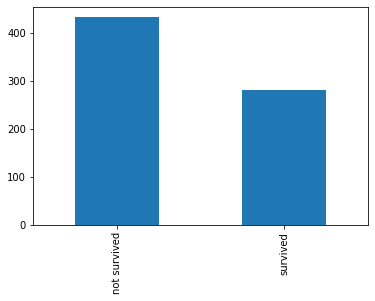

In [5]:
#possible variables to explore: survived, pclass, sex, age, sibsp, parch, embarked 
#take a look at look as a whole how many survived/not
dfTrain['Survived'].value_counts().plot.bar().set_xticklabels(['not survived', 'survived'])

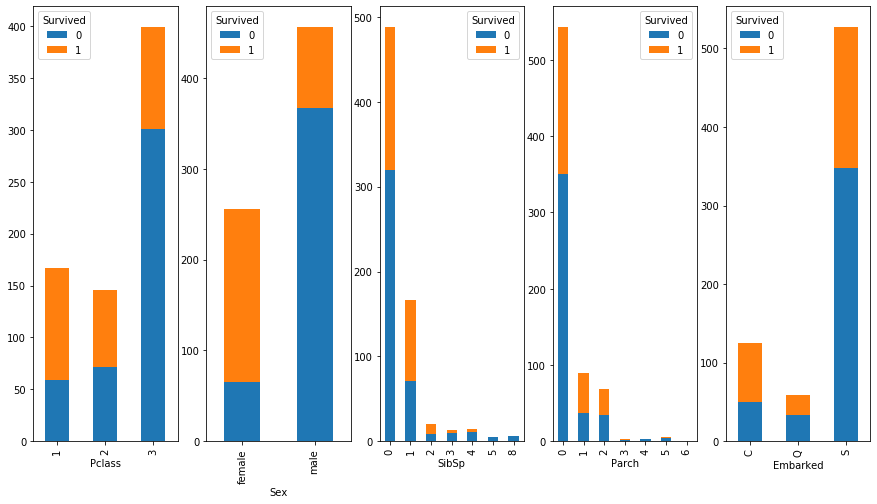

In [6]:
#how Pclass, Sex, Sibling/Spouse, Parent/Child and embarkment impact survival 
import matplotlib.pyplot as plt
fig, g=plt.subplots(1,5, figsize=(15,8))
dfTrain.groupby('Pclass')['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[0])
dfTrain.groupby('Sex')['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[1])
dfTrain.groupby('SibSp')['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[2])
dfTrain.groupby('Parch')['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[3])
dfTrain.groupby('Embarked')['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[4])

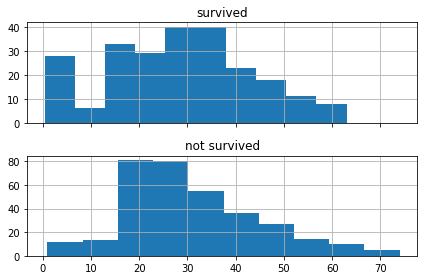

In [7]:
#how age impacts survival 
fig, g=plt.subplots(2,1, sharex=True)
dfTrain[dfTrain['Survived']==1]['Age'].hist(ax=g[0]).set_title('survived')
dfTrain[dfTrain['Survived']==0]['Age'].hist(ax=g[1]).set_title('not survived')
plt.tight_layout()

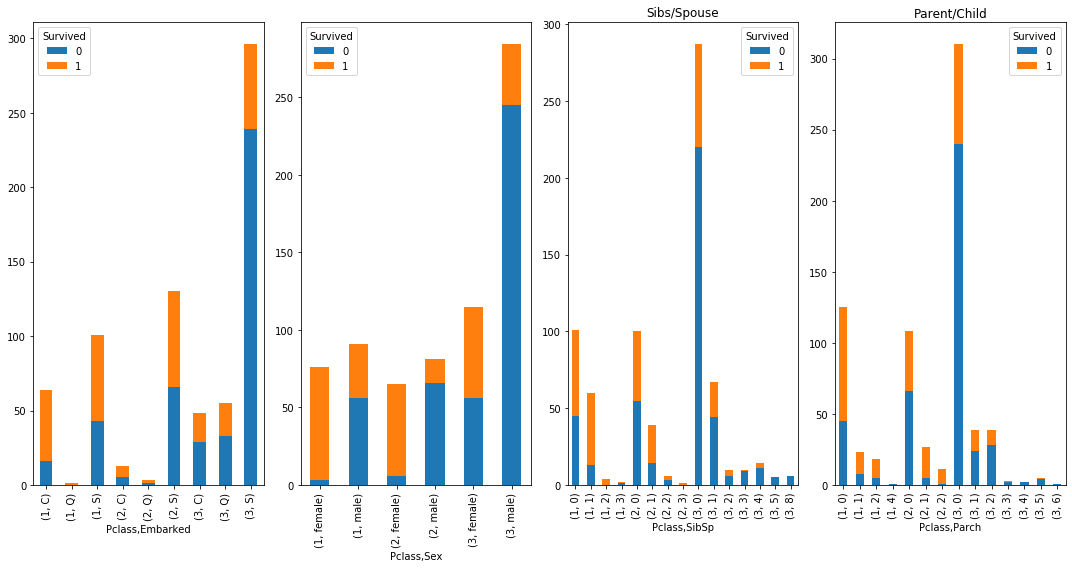

In [8]:
#how pclass impacts other features for survival 
fig, g=plt.subplots(1,4, figsize=(15,8))
dfTrain.groupby(['Pclass', 'Embarked'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[0])
dfTrain.groupby(['Pclass', 'Sex'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[1])
dfTrain.groupby(['Pclass', 'SibSp'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[2]).set_title('Sibs/Spouse')
dfTrain.groupby(['Pclass', 'Parch'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[3]).set_title('Parent/Child')
plt.tight_layout()

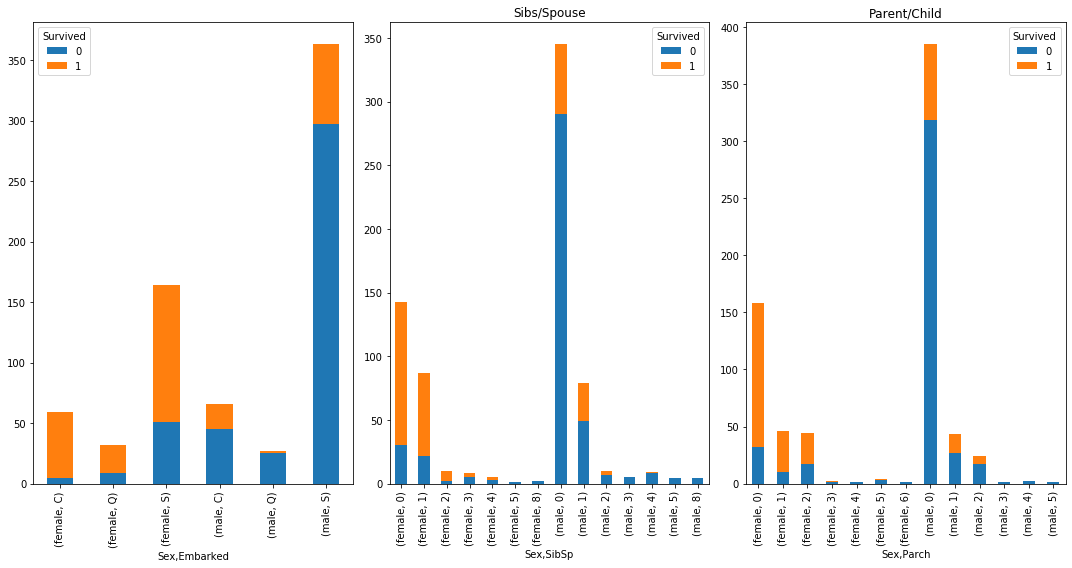

In [9]:
#how sex impacts other features for survival 
fig, g=plt.subplots(1,3, figsize=(15,8))
dfTrain.groupby(['Sex', 'Embarked'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[0])
dfTrain.groupby(['Sex', 'SibSp'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[1]).set_title('Sibs/Spouse')
dfTrain.groupby(['Sex', 'Parch'])['Survived'].value_counts().unstack().plot.bar(stacked=True, ax=g[2]).set_title('Parent/Child')
plt.tight_layout()

### Key data observations:
- analysis strongly suggest that passenger class and gender are key determinants in passenger survival  
- 3rd class and male gender have the highest influence when interacting with other features 
- males in 3rd class from small families/groups had the highest fatality rate 
- most passengers came from small family/groups 
- most passengers embarked from port S
- age distribution between survived and deceased don't vary much 

## Feature Engineering
- change non numerical features to numerical categorical features 
- create interactive features 

**Feature Engineering for training set**

In [10]:
#numerically encode embarked feature and seperate them into seperate columns via one-hot encoding 
oneHot=pd.get_dummies(xTrain['Embarked'])
xTrain=pd.concat([xTrain, oneHot], axis=1)
#numerically encode SibSp
oneHot=pd.get_dummies(xTrain['SibSp'], prefix='SS')
xTrain=pd.concat([xTrain, oneHot], axis=1)
#numerically encode Parch
oneHot=pd.get_dummies(xTrain['Parch'], prefix='PC')
xTrain=pd.concat([xTrain, oneHot], axis=1)
#numerically encode sex
oneHot=pd.get_dummies(xTrain['Sex'])
xTrain=pd.concat([xTrain, oneHot], axis=1)
#seperate pclass into seperate columns 
oneHot=pd.get_dummies(xTrain['Pclass'], prefix='Class')
xTrain=pd.concat([xTrain, oneHot], axis=1)

#create some interaction features and implementing them into the training set 
##class 1 based interaction features 
xTrain['c1male']=xTrain['Class_1']*xTrain['male']
xTrain['c1emS']=xTrain['Class_1']*xTrain['S']
xTrain['c1SS0']=xTrain['Class_1']*xTrain['SS_0']
xTrain['c1PC0']=xTrain['Class_1']*xTrain['PC_0']
#class 3 based interaction features 
xTrain['c3male']=xTrain['Class_3']*xTrain['male']
xTrain['c3emS']=xTrain['Class_3']*xTrain['S']
xTrain['c3SS0']=xTrain['Class_3']*xTrain['SS_0']
xTrain['c3PC0']=xTrain['Class_3']*xTrain['PC_0']
##gender based interaction features 
xTrain['maleSS0']=xTrain['male']*xTrain['SS_0']
xTrain['malePC0']=xTrain['male']*xTrain['PC_0']

#trying some more features 
##numerically change sex 
xTrain['Sex']=xTrain['Sex'].replace({'male':0, 'female':1})
##numerically fill in NaNs and bin age
xTrain['Age'].fillna((xTrain['Age'].mean()), inplace=True)
bins=pd.cut(xTrain['Age'], bins=[1,6,13,20,51,100], labels=['toddler', 'adolescent', 'teen', 'adult', 'elderly']) 
bin2=pd.get_dummies(bins)
xTrain=pd.concat([xTrain, bin2], axis=1)
##create some interaction features and implementing them into the training set 
xTrain['clSex']=xTrain['Pclass']*xTrain['Sex']
xTrain['SingleSex']=xTrain['Pclass']*xTrain['SibSp']
xTrain['AloneSex']=xTrain['Pclass']*xTrain['Parch']

#change ticket column to numerical based on last digit 
def get_initial(s):
    return s[-1]
xTrain['Ticket1'] = xTrain['Ticket'].apply(get_initial)
xTrain['Ticket1'].replace({'E':9}, inplace=True)
xTrain['Ticket1']=xTrain['Ticket1'].astype(int)

xTrain.columns, xTrain.shape

(Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'C', 'Q', 'S', 'SS_0', 'SS_1', 'SS_2', 'SS_3',
        'SS_4', 'SS_5', 'SS_8', 'PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5',
        'PC_6', 'female', 'male', 'Class_1', 'Class_2', 'Class_3', 'c1male',
        'c1emS', 'c1SS0', 'c1PC0', 'c3male', 'c3emS', 'c3SS0', 'c3PC0',
        'maleSS0', 'malePC0', 'toddler', 'adolescent', 'teen', 'adult',
        'elderly', 'clSex', 'SingleSex', 'AloneSex', 'Ticket1'],
       dtype='object'),
 (712, 51))

**Feature Engineering for test set**

In [11]:
#numerically encode embarked feature and seperate them into seperate columns via one-hot encoding 
oneHot=pd.get_dummies(xTest['Embarked'])
xTest=pd.concat([xTest, oneHot], axis=1)
#numerically encode SibSp
oneHot=pd.get_dummies(xTest['SibSp'], prefix='SS')
xTest=pd.concat([xTest, oneHot], axis=1)
#numerically encode Parch
oneHot=pd.get_dummies(xTest['Parch'], prefix='PC')
xTest=pd.concat([xTest, oneHot], axis=1)
#numerically encode sex
oneHot=pd.get_dummies(xTest['Sex'])
xTest=pd.concat([xTest, oneHot], axis=1)
#seperate pclass into seperate columns 
oneHot=pd.get_dummies(xTest['Pclass'], prefix='Class')
xTest=pd.concat([xTest, oneHot], axis=1)

#create some interaction features and implementing them into the training set 
##class 1 based interaction features 
xTest['c1male']=xTest['Class_1']*xTest['male']
xTest['c1emS']=xTest['Class_1']*xTest['S']
xTest['c1SS0']=xTest['Class_1']*xTest['SS_0']
xTest['c1PC0']=xTest['Class_1']*xTest['PC_0']
#class 3 based interaction features 
xTest['c3male']=xTest['Class_3']*xTest['male']
xTest['c3emS']=xTest['Class_3']*xTest['S']
xTest['c3SS0']=xTest['Class_3']*xTest['SS_0']
xTest['c3PC0']=xTest['Class_3']*xTest['PC_0']
##gender based interaction features 
xTest['maleSS0']=xTest['male']*xTest['SS_0']
xTest['malePC0']=xTest['male']*xTest['PC_0']

#trying some more features 
##numerically change sex 
xTest['Sex']=xTest['Sex'].replace({'male':0, 'female':1})
##numerically fill in NaNs and bin age
xTest['Age'].fillna((xTest['Age'].mean()), inplace=True)
bins=pd.cut(xTest['Age'], bins=[1,6,13,20,51,100], labels=['toddler', 'adolescent', 'teen', 'adult', 'elderly']) 
bin2=pd.get_dummies(bins)
xTest=pd.concat([xTest, bin2], axis=1)
##create some interaction features and implementing them into the training set 
xTest['clSex']=xTest['Pclass']*xTest['Sex']
xTest['SingleSex']=xTest['Pclass']*xTest['SibSp']
xTest['AloneSex']=xTest['Pclass']*xTest['Parch']

#change ticket column to numerical based on last digit 
def get_initial(s):
    return s[-1]
xTest['Ticket1'] = xTest['Ticket'].apply(get_initial)
xTest['Ticket1'].replace({'E':9}, inplace=True)
xTest['Ticket1']=xTest['Ticket1'].astype(int)

xTest.columns, xTest.shape

(Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'C', 'Q', 'S', 'SS_0', 'SS_1', 'SS_2', 'SS_3',
        'SS_4', 'SS_8', 'PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'female',
        'male', 'Class_1', 'Class_2', 'Class_3', 'c1male', 'c1emS', 'c1SS0',
        'c1PC0', 'c3male', 'c3emS', 'c3SS0', 'c3PC0', 'maleSS0', 'malePC0',
        'toddler', 'adolescent', 'teen', 'adult', 'elderly', 'clSex',
        'SingleSex', 'AloneSex', 'Ticket1'],
       dtype='object'),
 (179, 48))

*the reason for the test set having 3 fewer columns than the training set is because in the df split there are no passengers with SibSp 5, Parch 5 and 6. therefore, no columns for this fetures were created in the one-hot encoding*

### Building models  

In [12]:
#custome makes interaction lists for modeling 
nonInteract=['Pclass', 'female', 'male', 'SibSp', 'Parch', 'Q', 'S', 'SS_2', 'SS_3', 'PC_2', 'PC_3']
c1List=['c1male', 'c1emS','c1SS0', 'c1PC0']
c3List=['c3male', 'c3emS', 'c3SS0', 'c3PC0']
genList=['maleSS0', 'malePC0']
newTry=['clSex', 'toddler', 'adolescent', 'teen', 'adult', 'elderly', 'Age', 'SingleSex', 'AloneSex', 'Ticket1']

In [13]:
#lists for function 
##list of the different features that will be applied 
xIndex=[nonInteract, c1List, c3List, genList, c1List+c3List+genList, nonInteract+c1List+c3List+genList, newTry, nonInteract+c1List+c3List+genList+newTry] 
##list of the model names that will be given 
modName=['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']

In [14]:
##import needed functions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
    
def modGenerator(xIndex, modName):
    xTest1=xTest
    y=yTrain
    accScore=[]
    precScore=[]
    recallScore=[]
    f1Score=[]
    
    ##for loop for model generation
    for i in range(len(xIndex)):
        m=LogisticRegression()
        X=xTrain[xIndex[i]]
        m.fit(X, y) 
        
        ##calculate evaluation classifiers 
        yPredm=m.predict(X)
        accVal=accuracy_score(y, yPredm)
        accScore.append(accVal)
        precVal=precision_score(y, yPredm)
        precScore.append(precVal)
        recVal=recall_score(y, yPredm)
        recallScore.append(recVal)
        f1Val=2*(precVal*recVal)/(precVal+recVal)
        f1Score.append(f1Val)
    
    ##build a table for easy visual comparison     
    tableIndex={'accuracy score':accScore, 'precision score':precScore, 'recall score':recallScore, 'F1 score': f1Score}
    evalTable=pd.DataFrame(tableIndex, index=modName)
    display(evalTable)   

In [15]:
modGenerator(xIndex, modName)

/Users/gdquiceno2/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/gdquiceno2/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

,accuracy score,precision score,recall score,F1 score
model 1,0.797753,0.761538,0.707143,0.733333
model 2,0.671348,0.712963,0.275000,0.396907
model 3,0.705056,0.597765,0.764286,0.670846
model 4,0.757022,0.672026,0.746429,0.707276
model 5,0.810393,0.803347,0.685714,0.739884
model 6,0.816011,0.789883,0.725000,0.756052
model 7,0.702247,0.702381,0.421429,0.526786
model 8,0.832865,0.825911,0.728571,0.774194


In [16]:
##import needed functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
    
def modDecision(xIndex, modName):
    xTest1=xTest
    y=yTrain
    accScore=[]
    precScore=[]
    recallScore=[]
    f1Score=[]
    
    ##for loop for model generation
    for i in range(len(xIndex)):
        m=DecisionTreeClassifier()
        X=xTrain[xIndex[i]]
        m.fit(X, y) 
        ##calculate evaluation classifiers 
        yPredm=m.predict(X)
        accVal=accuracy_score(y, yPredm)
        accScore.append(accVal)
        precVal=precision_score(y, yPredm)
        precScore.append(precVal)
        recVal=recall_score(y, yPredm)
        recallScore.append(recVal)
        f1Val=2*(precVal*recVal)/(precVal+recVal)
        f1Score.append(f1Val)
    
    ##build a table for easy visual comparison     
    tableIndex={'accuracy score':accScore, 'precision score':precScore, 'recall score':recallScore, 'F1 score': f1Score}
    evalTable=pd.DataFrame(tableIndex, index=modName)
    display(evalTable)   

In [17]:
modDecision(xIndex, modName)

,accuracy score,precision score,recall score,F1 score
model 1,0.842697,0.903846,0.671429,0.770492
model 2,0.705056,0.960526,0.260714,0.410112
model 3,0.709270,0.597855,0.796429,0.683002
model 4,0.757022,0.672026,0.746429,0.707276
model 5,0.823034,0.856481,0.660714,0.745968
model 6,0.842697,0.903846,0.671429,0.770492
model 7,0.962079,0.992218,0.910714,0.949721
model 8,0.977528,0.996241,0.946429,0.970696


In [19]:
##import needed functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
    
def modRF(xIndex, modName):
    xTest1=xTest
    y=yTrain
    accScore=[]
    precScore=[]
    recallScore=[]
    f1Score=[]
    
    ##for loop for model generation
    for i in range(len(xIndex)):
        m=RandomForestClassifier()
        X=xTrain[xIndex[i]]
        m.fit(X, y) 
        
        ##calculate evaluation classifiers 
        yPredm=m.predict(X)
        accVal=accuracy_score(y, yPredm)
        accScore.append(accVal)
        precVal=precision_score(y, yPredm)
        precScore.append(precVal)
        recVal=recall_score(y, yPredm)
        recallScore.append(recVal)
        f1Val=2*(precVal*recVal)/(precVal+recVal)
        f1Score.append(f1Val)
    
    ##build a table for easy visual comparison     
    tableIndex={'accuracy score':accScore, 'precision score':precScore, 'recall score':recallScore, 'F1 score': f1Score}
    evalTable=pd.DataFrame(tableIndex, index=modName)
    display(evalTable) 

In [20]:
modRF(xIndex, modName)

,accuracy score,precision score,recall score,F1 score
model 1,0.842697,0.855932,0.721429,0.782946
model 2,0.705056,0.960526,0.260714,0.410112
model 3,0.709270,0.592405,0.835714,0.693333
model 4,0.757022,0.672026,0.746429,0.707276
model 5,0.823034,0.820833,0.703571,0.757692
model 6,0.842697,0.881818,0.692857,0.776000
model 7,0.962079,0.973783,0.928571,0.950640
model 8,0.977528,0.985294,0.957143,0.971014


## Evaluating models 
- all code adapted from this blog [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [21]:
#lists for function 
##list of the different features that will be applied 
xIndex=[nonInteract, c1List, c3List, genList, c1List+c3List+genList, nonInteract+c1List+c3List+genList, newTry, nonInteract+c1List+c3List+genList+newTry] 
##list of the model names that will be given 
modName=['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']

In [22]:
#import libraries for function 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def modPlots(xIndex, modName, yTest):
    xTest1=xTest
    y=yTrain
    aucScore=[] ##auc's that will be calculated in forloop stored in this string 
    
    #initiate the ROC and precision-recall graphs that will be supplemented by the fo loop 
    fig, (g1, g2)=plt.subplots(1,2, figsize=(15,8))
    nsProbs=[0 for num in range(len(yTest))] ##create variable for random chance line for ROC graph 
    nsFP, nsTP, _=roc_curve(yTest, nsProbs) ##calc this random chance line based on variable 
    g1.plot(nsFP, nsTP, linestyle='--', label='No Skill') ##add random chance curve to ROC subplot 
    nsProbs2=len(yTest[yTest==1])/len(yTest) ##create random chance curve for precision-recall sub graph
    g2.plot([0,1], [nsProbs2, nsProbs2], linestyle='--', label='No Skill') ##add random chance curve to precision-recall sub graph

    ##regenrate needed models 
    for i in range(len(xIndex)):
        m=LogisticRegression()
        X=xTrain[xIndex[i]]
        xTest1=xTest[xIndex[i]]
        m.fit(X, y)
        mProbs=m.predict_proba(xTest1)[:, :1]
        #calculate AUC score 
        mAUC=roc_auc_score(yTest, mProbs)
        aucScore.append(mAUC)
        ##calculate ROC curves 
        mFP, mTP, _=roc_curve(yTest, mProbs)
    
        ##graph ROC curve for every model 
        g1.plot(mFP, mTP, linestyle=':', label=modName[i])    
        g1.set_xlabel('False Positive Rate')
        g1.set_ylabel('True Positive Rate')
        g1.set_title('Reciever Operating Characteristic Curve')
        g1.legend()
    
        #collecting values for precision-recall curve
        mPrecision, mRecall, _=precision_recall_curve(yTest, mProbs)
        yhat=m.predict(xTest1)
        mF1=f1_score(yTest, yhat)
    
        #build precision-recall curves
        g2.plot(mRecall, mPrecision, marker='.', label=modName[i])
        g2.set_xlabel('Recall')
        g2.set_ylabel('Precision')
        g2.set_title('Precision-Recall Curve')
        g2.legend() 
    plt.savefig('logROC.png')
    plt.show()
    
    #save AUC values into table 
    nsAUC=roc_auc_score(yTest, nsProbs) ##calculate AUC score
    aucScore.append(nsAUC)
    modName.append('no skill')
    aucTable=pd.DataFrame({'area under curve':aucScore}, index=modName)
    display(aucTable)

/Users/gdquiceno2/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/gdquiceno2/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

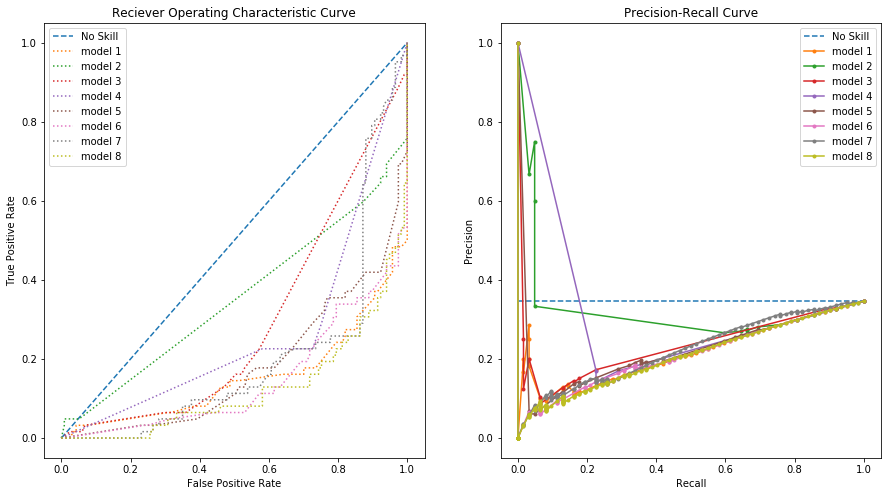

,area under curve
model 1,0.153639
model 2,0.353460
model 3,0.291356
model 4,0.264957
model 5,0.179556
model 6,0.146057
model 7,0.203543
model 8,0.125241
no skill,0.500000


In [23]:
modPlots(xIndex, modName, yTest)

In [24]:
#lists for function 
##list of the different features that will be applied 
xIndex=[nonInteract, c1List, c3List, genList, c1List+c3List+genList, nonInteract+c1List+c3List+genList, newTry, nonInteract+c1List+c3List+genList+newTry] 
##list of the model names that will be given 
modName=['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']

In [25]:
#import libraries for function 
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def dtPlots(xIndex, modName, yTest):
    xTest1=xTest
    y=yTrain
    aucScore=[] ##auc's that will be calculated in forloop stored in this string 
    
    #initiate the ROC and precision-recall graphs that will be supplemented by the fo loop 
    fig, (g1, g2)=plt.subplots(1,2, figsize=(15,8))
    nsProbs=[0 for num in range(len(yTest))] ##create variable for random chance line for ROC graph 
    nsFP, nsTP, _=roc_curve(yTest, nsProbs) ##calc this random chance line based on variable 
    g1.plot(nsFP, nsTP, linestyle='--', label='No Skill') ##add random chance curve to ROC subplot 
    nsProbs2=len(yTest[yTest==1])/len(yTest) ##create random chance curve for precision-recall sub graph
    g2.plot([0,1], [nsProbs2, nsProbs2], linestyle='--', label='No Skill') ##add random chance curve to precision-recall sub graph

    ##regenrate needed models 
    for i in range(len(xIndex)):
        m=DecisionTreeClassifier()
        X=xTrain[xIndex[i]]
        xTest1=xTest[xIndex[i]]
        m.fit(X, y)
        mProbs=m.predict_proba(xTest1)[:, :1]
        #calculate AUC score 
        mAUC=roc_auc_score(yTest, mProbs)
        aucScore.append(mAUC)
        ##calculate ROC curves 
        mFP, mTP, _=roc_curve(yTest, mProbs)
    
        ##graph ROC curve for every model 
        g1.plot(mFP, mTP, linestyle=':', label=modName[i])    
        g1.set_xlabel('False Positive Rate')
        g1.set_ylabel('True Positive Rate')
        g1.set_title('Reciever Operating Characteristic Curve')
        g1.legend()
    
        #collecting values for precision-recall curve
        mPrecision, mRecall, _=precision_recall_curve(yTest, mProbs)
        yhat=m.predict(xTest1)
        mF1=f1_score(yTest, yhat)
    
        #build precision-recall curves
        g2.plot(mRecall, mPrecision, marker='.', label=modName[i])
        g2.set_xlabel('Recall')
        g2.set_ylabel('Precision')
        g2.set_title('Precision-Recall Curve')
        g2.legend()
    plt.savefig('dtROC.png')
    plt.show()
    
    #save AUC values into table 
    nsAUC=roc_auc_score(yTest, nsProbs) ##calculate AUC score
    aucScore.append(nsAUC)
    modName.append('no skill')
    aucTable=pd.DataFrame({'area under curve':aucScore}, index=modName)
    display(aucTable)

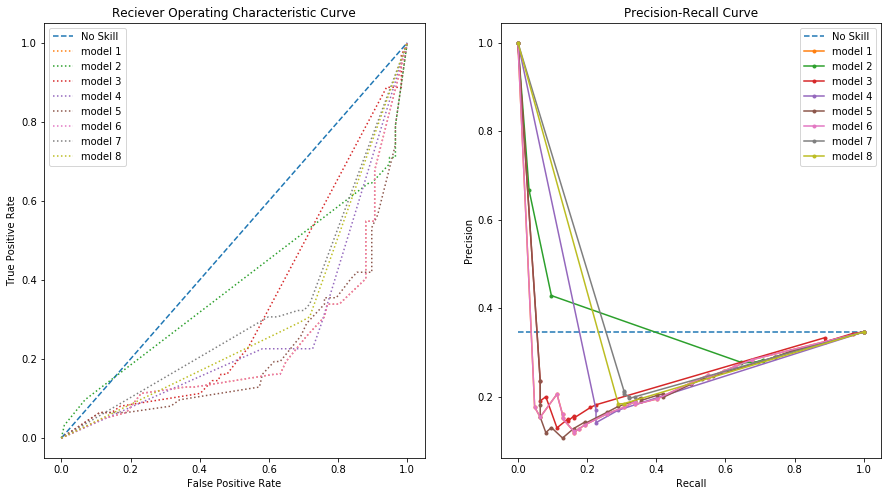

,area under curve
model 1,0.232423
model 2,0.390957
model 3,0.330852
model 4,0.264957
model 5,0.217880
model 6,0.232423
model 7,0.318307
model 8,0.293700
no skill,0.500000


In [26]:
dtPlots(xIndex, modName, yTest)

In [27]:
#lists for function 
##list of the different features that will be applied 
xIndex=[nonInteract, c1List, c3List, genList, c1List+c3List+genList, nonInteract+c1List+c3List+genList, newTry, nonInteract+c1List+c3List+genList+newTry] 
##list of the model names that will be given 
modName=['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']

In [28]:
#import libraries for function 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def rfPlots(xIndex, modName, yTest):
    xTest1=xTest
    y=yTrain
    aucScore=[] ##auc's that will be calculated in forloop stored in this string 
    
    #initiate the ROC and precision-recall graphs that will be supplemented by the fo loop 
    fig, (g1, g2)=plt.subplots(1,2, figsize=(15,8))
    nsProbs=[0 for num in range(len(yTest))] ##create variable for random chance line for ROC graph 
    nsFP, nsTP, _=roc_curve(yTest, nsProbs) ##calc this random chance line based on variable 
    g1.plot(nsFP, nsTP, linestyle='--', label='No Skill') ##add random chance curve to ROC subplot 
    nsProbs2=len(yTest[yTest==1])/len(yTest) ##create random chance curve for precision-recall sub graph
    g2.plot([0,1], [nsProbs2, nsProbs2], linestyle='--', label='No Skill') ##add random chance curve to precision-recall sub graph

    ##regenrate needed models 
    for i in range(len(xIndex)):
        m=RandomForestClassifier()
        X=xTrain[xIndex[i]]
        xTest1=xTest[xIndex[i]]
        m.fit(X, y)
        mProbs=m.predict_proba(xTest1)[:, :1]
        #calculate AUC score 
        mAUC=roc_auc_score(yTest, mProbs)
        aucScore.append(mAUC)
        ##calculate ROC curves 
        mFP, mTP, _=roc_curve(yTest, mProbs)
    
        ##graph ROC curve for every model 
        g1.plot(mFP, mTP, linestyle=':', label=modName[i])    
        g1.set_xlabel('False Positive Rate')
        g1.set_ylabel('True Positive Rate')
        g1.set_title('Reciever Operating Characteristic Curve')
        g1.legend()
    
        #collecting values for precision-recall curve
        mPrecision, mRecall, _=precision_recall_curve(yTest, mProbs)
        yhat=m.predict(xTest1)
        mF1=f1_score(yTest, yhat)
    
        #build precision-recall curves
        g2.plot(mRecall, mPrecision, marker='.', label=modName[i])
        g2.set_xlabel('Recall')
        g2.set_ylabel('Precision')
        g2.set_title('Precision-Recall Curve')
        g2.legend()
    plt.savefig('rfROC.png')
    plt.show()
    
    #save AUC values into table 
    nsAUC=roc_auc_score(yTest, nsProbs) ##calculate AUC score
    aucScore.append(nsAUC)
    modName.append('no skill')
    aucTable=pd.DataFrame({'area under curve':aucScore}, index=modName)
    display(aucTable)

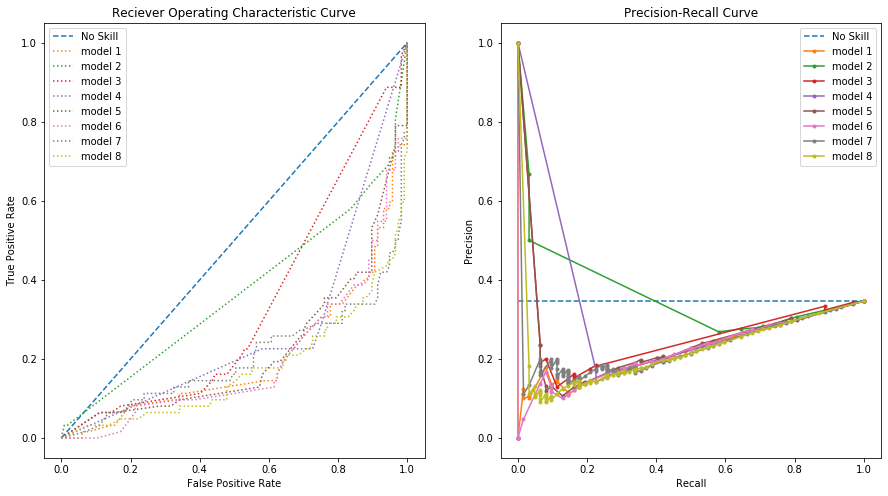

,area under curve
model 1,0.200648
model 2,0.365867
model 3,0.331197
model 4,0.264957
model 5,0.214709
model 6,0.194582
model 7,0.202854
model 8,0.173973
no skill,0.500000


In [29]:
rfPlots(xIndex, modName, yTest)

## Hyperparameter Optimization

In [30]:
#attempt to optimize randomforest

##build model 
from sklearn.ensemble import RandomForestClassifier
X=xTrain[newTry]
y=yTrain
m=RandomForestClassifier()
m.fit(X,y)

#run grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [20, 50, 100, 250, 500, 700],'max_depth': [1, 3, 5, 10, None]}
gridcv = GridSearchCV(m, param_grid=param_grid)
gridcv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [31]:
#take a closer look at optimal parameters
gridcv.best_estimator_
results = pd.DataFrame(gridcv.cv_results_)
columns = ['mean_test_score', 'std_test_score', 'mean_fit_time', 'param_max_depth','param_n_estimators']
results[columns].sort_values('mean_test_score', ascending=False).head()

,mean_test_score,std_test_score,mean_fit_time,param_max_depth,param_n_estimators
15,0.817502,0.031518,0.502761,5,250
16,0.817502,0.037284,1.010464,5,500
17,0.817502,0.035930,1.441735,5,700
7,0.816074,0.030877,0.086960,3,50
13,0.814705,0.033738,0.101976,5,50


## Accuracy with test data 

In [32]:
##build model 
from sklearn.ensemble import RandomForestClassifier
X=xTrain[nonInteract+c1List+c3List+genList+newTry]
y=yTrain
m=RandomForestClassifier(max_depth=5, n_estimators=250)
m.fit(X,y)

xTest1=xTest[nonInteract+c1List+c3List+genList+newTry]

print('training score: ', m.score(X, y).round(3))
print('test score: ', m.score(xTest1, yTest).round(3))

training score:  0.846
test score:  0.827
